In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import glob, os
import numpy as np
import datetime
from pathlib import Path

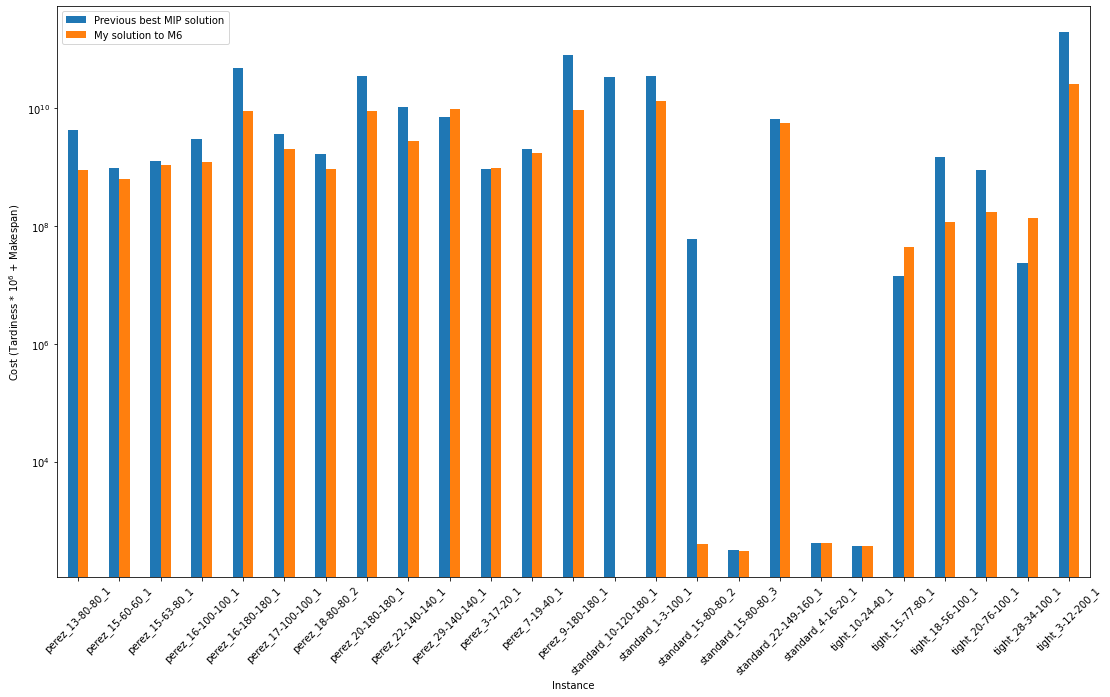

In [2]:
tardiness = [[4234, 874], [958, 633], [1256, 1079], [2917, 1228], [47234, 8789], [3649, 2007],
[1649, 903], [34619, 8780], [10542, 2783], [7130, 9645], [927, 957],
[1976, 1752], [78859, 9291], [33756, 0], [34442, 13338], [59, 0],
[0,0], [6467, 5491], [0,0], [0,0], [14, 43], [1455, 117], [877, 171],
[23, 134], [192462, 24995]]
                
makespan = [[673,360],[371,313],[496,343],[523,356],[1776,675],[532,356],
           [401,334],[1457,603],[683,431],[464,505],[520,611],[514,465],
           [2645,874],[2427,0],[7589,5909],[734,407],[322,304],[1072,1022],
           [409,409],[373,373],[644,443],[524,349],[580,309],[478,242],
           [7190,3184]]
cost = []
for i in range(len(tardiness)):
    cost.append({'Previous best MIP solution':(tardiness[i][0]*1000000 + makespan[i][0]),
                'My solution to M6':(tardiness[i][1]*1000000 + makespan[i][1])})
    
instances = ["perez_13-80-80_1",
"perez_15-60-60_1",
"perez_15-63-80_1",
"perez_16-100-100_1",
"perez_16-180-180_1",
"perez_17-100-100_1",
"perez_18-80-80_2",
"perez_20-180-180_1",
"perez_22-140-140_1",
"perez_29-140-140_1",
"perez_3-17-20_1",
"perez_7-19-40_1",
"perez_9-180-180_1",
"standard_10-120-180_1",
"standard_1-3-100_1",
"standard_15-80-80_2",
"standard_15-80-80_3",
"standard_22-149-160_1",
"standard_4-16-20_1",
"tight_10-24-40_1",
"tight_15-77-80_1",
"tight_18-56-100_1",
"tight_20-76-100_1",
"tight_28-34-100_1",
"tight_3-12-200_1"]
    
df = pd.DataFrame(cost, 
                  index=instances)



ax = df.plot.bar(rot=0)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation = 45)
plt.yscale("log")

ax.set(xlabel='Instance', ylabel='Cost (Tardiness * $10^6$ + Makespan)',
   title='')

plt.savefig('mip_comparison.png')
    

import shutil
import datetime

# Move all 30 min SA files into a single folder

paths = ["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_1_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_2_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_3_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_4_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_5_long"]
output_path = "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_long"

for path in paths:
    os.chdir(path)
    print(path)
    for filename in glob.glob("*.info"):
        print(dst_dir)
        i = 1
        while True:
            src_dir= path + "\\" + filename
            dst_dir= output_path + "\\" + filename.split('.')[0] + "_" + str(i) + ".soln.info"
            if(os.path.exists(dst_dir)):
                i += 1
                continue
            shutil.copy(src_dir,dst_dir)
            break

In [3]:
import sys
import glob, os
import statistics
import numpy as np
import matplotlib.pyplot as plt


def get_info(solution, splitter_symbol = ':'):
    f = open(solution, "r")
    lines = f.read().split('\n')
    (tardiness, makespan) =  (0, 0)
    for line in lines:
        if 'Tardiness' in line:
            tardiness = int(line.split(splitter_symbol)[1])
        if 'Makespan' in line:
            makespan = int(line.split(splitter_symbol)[1])
    return (tardiness, makespan)

In [4]:
path_to_instances = "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\instances.txt"
f = open(path_to_instances, "r")
instances_with_ending = f.read().split('\n')
instances = []
for instance in instances_with_ending:
    if instance == "":
        continue
    instances.append(instance.split('.')[0])


In [5]:


def load_info(paths_to_runs, splitter_symbol = ':'):
    scores_tardiness = {}
    scores_makespan = {}
    tardiness_list = []
    makespan_list = []
    
    f = open(path_to_instances, "r")

    instances = f.read().split('\n')
    if '' in instances:
        instances.remove('')
    if ' ' in instances:
        instances.remove(' ')
    
    for path_to_runs in paths_to_runs:
        os.chdir(path_to_runs)
        solutions = glob.glob("*.info")

        for instance in instances:
            name = instance.split('.')[0]
            for solution in solutions:
                if name in solution or name.replace("s", "standard") in solution or name.replace("p", "perez") in solution or name.replace("t", "tight") in solution:
                    (tardiness, makespan) = get_info(solution, splitter_symbol)
                    tardiness_list.append(tardiness)
                    makespan_list.append(makespan)
                    if name in scores_tardiness:
                        scores_tardiness[name].append(tardiness)
                    else:
                        scores_tardiness[name] = [tardiness]
                    if name in scores_makespan:
                        scores_makespan[name].append(makespan)
                    else:
                        scores_makespan[name] = [makespan]

    tardiness_median = {}
    tardiness_mean = {}
    makespan_median = {}
    makespan_mean = {}
    for (score, median, mean) in [(scores_tardiness, tardiness_median, tardiness_mean),
    (scores_makespan, makespan_median, makespan_mean)]:
        for key in score.keys():
            median[key] = statistics.median(score[key])
            mean[key] = statistics.mean(score[key])

    total_t_med = statistics.median(tardiness_list)
    total_t_mea = statistics.mean(tardiness_list)
    total_ms_med = statistics.median(makespan_list)
    total_ms_mea = statistics.mean(makespan_list)

    print("tardiness median: ",total_t_med, "\nTardiness mean: ", total_t_mea, "\n", total_ms_med, total_ms_mea)
    
    return tardiness_list, scores_tardiness, scores_makespan

In [6]:
sa_1_t_mean, sa_1_t, sa_1_ms = load_info(["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_1m_long"])

tardiness median:  73.5 
Tardiness mean:  662.4416666666667 
 1933.0 4478.6258333333335


In [7]:
sa_3_t_mean, sa_3_t, sa_3_ms = load_info(["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_3m_long"])

tardiness median:  71.5 
Tardiness mean:  347.9275 
 1227.0 3862.3316666666665


In [8]:
sa_30_t_mean, sa_30_t, sa_30_ms = load_info(["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_long"])

tardiness median:  7.0 
Tardiness mean:  216.63333333333333 
 1012.5 3162.09


In [9]:
sa_1_max_t_mean, sa_1_max_t, sa_1_max_ms = load_info(["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Data\\solutions\\validation-set-solutions\\sac-ch"] , '=')

tardiness median:  8.0 
Tardiness mean:  322.61833333333334 
 1365.0 3291.4929166666666


In [35]:
moser_t_mean, moser_t, moser_ms = load_info([
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Data\\solutions\\validation-set-solutions\\sac-ch",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Data\\solutions\\validation-set-solutions\\sac-r",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Data\\solutions\\validation-set-solutions\\sai-ch",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Data\\solutions\\validation-set-solutions\\sai-r",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Data\\solutions\\validation-set-solutions\\sar-ch",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Data\\solutions\\validation-set-solutions\\sac-r",] , '=')

tardiness median:  35.0 
Tardiness mean:  358.57965277777777 
 1401.5 3556.4713194444444


In [46]:
fabian_t_mean, fabian_t, fabian_ms = load_info([
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_1m_long",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_3m_long",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_long",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\vlns_3m_bugfix_py",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\vlns_30m_bugfix_py",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\hybrid_3m",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\hybrid_30m",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\parahy_3m",
"C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\parahy_30m"])


tardiness median:  152 
Tardiness mean:  138365.15552680753 
 1579 4587.729481098175


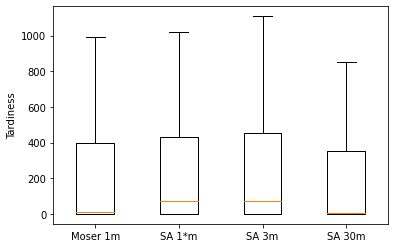

In [10]:
fig1, ax1 = plt.subplots()
ls_mean = [list(sa_1_max_t_mean), list(sa_1_t_mean), list(sa_3_t_mean), list(sa_30_t_mean)]
ax1.boxplot(ls_mean, showfliers=False)
ax1.set_xticklabels(['Moser 1m', 'SA 1*m', 'SA 3m', 'SA 30m'])
plt.ylabel("Tardiness")
plt.show()

VLNS 3m
tardiness median:  87305.0 
Tardiness mean:  737330.8866666667 
 3110.0 7691.919166666667
VLNS 30m
tardiness median:  38867 
Tardiness mean:  629120.2857142857 
 2755 6922.882352941177
H-VLNS 3m
tardiness median:  123 
Tardiness mean:  870.7572977481234 
 1463 4032.7572977481236
H-VLNS 30m
tardiness median:  127.0 
Tardiness mean:  942.1833333333333 
 1591.5 4036.3083333333334
P-VLNS 3m
tardiness median:  35.0 
Tardiness mean:  347.7441666666667 
 1285.0 3534.5175
P-VLNS 30m
tardiness median:  13 
Tardiness mean:  228.51260504201682 
 1221 3321.436974789916


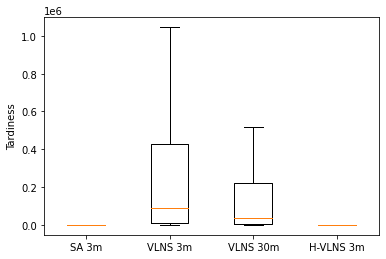

In [11]:
print("VLNS 3m")
vlns_3m, vlns_3m_t, vlns_3m_ms = load_info(["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\vlns_3m_bugfix_py"])

print("VLNS 30m")
vlns_30m, vlns_30m_t, vlns_30m_ms = load_info(["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\vlns_30m_bugfix_py"])

print("H-VLNS 3m")
hy_3m, hy_3m_t, hy_3m_ms = load_info(["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\hybrid_3m"])

print("H-VLNS 30m")
hy_30m, hy_30m_t, hy_30m_ms = load_info(["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\hybrid_30m"])

print("P-VLNS 3m")
parahy_3m, parahy_3m_t, parahy_3m_ms = load_info(["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\parahy_3m"])

print("P-VLNS 30m")
parahy_30m, parahy_30m_t, parahy_30m_ms = load_info(["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\parahy_30m"])

fig1, ax1 = plt.subplots()
ls_bugfix = [list(sa_3_t_mean), list(vlns_3m), list(vlns_30m), list(hy_3m)]
ax1.boxplot(ls_bugfix, showfliers=False)
ax1.set_xticklabels(['SA 3m', 'VLNS 3m', 'VLNS 30m', 'H-VLNS 3m'])
plt.ylabel("Tardiness")
plt.show()

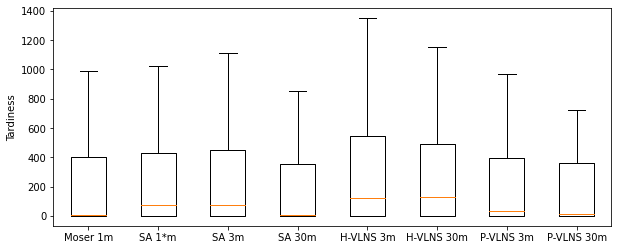

In [12]:
fig1, ax1 = plt.subplots()
ls_bugfix = [list(sa_1_max_t_mean), list(sa_1_t_mean), list(sa_3_t_mean),list(sa_30_t_mean), list(hy_3m), list(hy_30m), list(parahy_3m), list(parahy_30m)]
ax1.boxplot(ls_bugfix, showfliers=False)
ax1.set_xticklabels(['Moser 1m', 'SA 1*m', 'SA 3m', 'SA 30m', 'H-VLNS 3m', 'H-VLNS 30m', 'P-VLNS 3m', 'P-VLNS 30m'])
plt.ylabel("Tardiness")
fig1.set_size_inches(10, 4)
plt.show()

In [36]:
def min_score(tardiness, makespan):
    output = []
    for instance in instances:
        if instance not in tardiness:
            output.append(999999999999999)
            continue
        curr_t = tardiness[instance]
        curr_ms = makespan[instance]
        curr_scores = [(curr_t[i]*1000000 + curr_ms[i]) for i in range(len(curr_t))]
        output.append(min(curr_scores))
    return output

def min_tardiness(tardiness):
    output = []
    for instance in instances:
        if instance not in tardiness:
            output.append(999999999999999)
            continue
        curr_t = tardiness[instance]
        curr_scores = [(curr_t[i]) for i in range(len(curr_t))]
        output.append(min(curr_scores))
    return output

In [49]:
def merge_score_lists(list1, list2):
    '''
    Takes two score lists and combines them into a single list that has the minimum values of both lists
    '''
    if(len(list1) != len(list2)):
        raise ValueError("Lists have different lengths")
        
    output_list = []
    for i in range(len(list1)):
        if list1[i] < list2[i]:
            output_list.append(list1[i])
        else:
            output_list.append(list2[i])
    return output_list

In [50]:
vlns_3m_scores = min_score(vlns_3m_t, vlns_3m_ms)
vlns_30m_scores = min_score(vlns_30m_t, vlns_30m_ms)

hy_3m_scores = min_score(hy_3m_t, hy_3m_ms)
hy_30m_scores = min_score(hy_30m_t, hy_30m_ms)

parahy_3m_scores = min_score(parahy_3m_t, parahy_3m_ms)
parahy_30m_scores = min_score(parahy_30m_t, parahy_30m_ms)

hy_30m_scores = min_score(hy_30m_t, hy_30m_ms)


sa_3m_scores = min_score(sa_3_t, sa_3_ms)
sa_1m_scores = min_score(sa_1_t, sa_1_ms)
sa_1_max_scores = min_score(sa_1_max_t, sa_1_max_ms)
sa_30m_scores = min_score(sa_30_t, sa_30_ms)

moser_min_score = min_score(moser_t, moser_ms)
fabian_min_score = min_score(fabian_t, fabian_ms)

all_min_scores = merge_score_lists(moser_min_score, fabian_min_score)

sa_3m_t = min_tardiness(sa_3_t)
sa_1m_t = min_tardiness(sa_1_t)
sa_1_max_t = min_tardiness(sa_1_max_t)
sa_30m_t = min_tardiness(sa_30_t)
vlns_3m_t_d = min_tardiness(vlns_3m_t)
vlns_30m_t_d = min_tardiness(vlns_30m_t)

hy_3m_t_d = min_tardiness(hy_3m_t)
hy_30m_t_d = min_tardiness(hy_30m_t)

parahy_3m_t_d = min_tardiness(parahy_3m_t)
parahy_30m_t_d = min_tardiness(parahy_30m_t)

In [64]:
def print_methods_were_is_better_or_equal(scores1, scores2, print_individual_differences = True):
    '''
    Prints instances were the FIRST argument is better or equal
    '''
    instances_count = 0
    for i in range(len(scores1)):
        if scores1[i] <= scores2[i]:
            if print_individual_differences:
                print(instances[i], ": ", scores1[i], " vs ", scores2[i])
            instances_count += 1
    print("Better in ", instances_count, "/", len(scores1), "(", float(instances_count)/len(scores1)*100, "%)")
    
def print_methods_were_is_better(scores1, scores2, print_individual_differences = True):
    '''
    Prints instances were the FIRST argument is better or equal
    '''
    instances_count = 0
    for i in range(len(scores1)):
        if scores1[i] < scores2[i]:
            if print_individual_differences:
                print(instances[i], ": ", scores1[i], " vs ", scores2[i])
            instances_count += 1
    print("Better in ", instances_count, "/", len(scores1), "(", float(instances_count)/len(scores1)*100, "%)")

In [79]:
print("fabian")
print_methods_were_is_better_or_equal(fabian_min_score, all_min_scores, False)
print_methods_were_is_better_or_equal(fabian_min_score, moser_min_score, False)

fabian
Better in  98 / 120 ( 81.66666666666667 %)
Better in  98 / 120 ( 81.66666666666667 %)


In [80]:
print("moser")
print_methods_were_is_better_or_equal(moser_min_score, all_min_scores, False)
print_methods_were_is_better_or_equal(moser_min_score, moser_min_score, False)

moser
Better in  26 / 120 ( 21.666666666666668 %)
Better in  120 / 120 ( 100.0 %)


In [81]:
print("sa 1*m")
print_methods_were_is_better_or_equal(sa_1m_scores, all_min_scores, False)
print_methods_were_is_better_or_equal(sa_1m_scores, moser_min_score, False)

sa 1*m
Better in  7 / 120 ( 5.833333333333333 %)
Better in  16 / 120 ( 13.333333333333334 %)


In [82]:
print("sa 3m")
print_methods_were_is_better_or_equal(sa_3m_scores, all_min_scores, False)
print_methods_were_is_better_or_equal(sa_3m_scores, moser_min_score, False)

sa 3m
Better in  6 / 120 ( 5.0 %)
Better in  52 / 120 ( 43.333333333333336 %)


In [83]:
print("sa 30m")
print_methods_were_is_better_or_equal(sa_30m_scores, all_min_scores, False)
print_methods_were_is_better_or_equal(sa_30m_scores, moser_min_score, False)

sa 30m
Better in  78 / 120 ( 65.0 %)
Better in  91 / 120 ( 75.83333333333333 %)


In [84]:
print("vlns 3m")
print_methods_were_is_better_or_equal(vlns_3m_scores, all_min_scores, False)
print_methods_were_is_better_or_equal(vlns_3m_scores, moser_min_score, False)

vlns 3m
Better in  0 / 120 ( 0.0 %)
Better in  0 / 120 ( 0.0 %)


In [85]:
print("vlns 30m")
print_methods_were_is_better_or_equal(vlns_30m_scores, all_min_scores, False)
print_methods_were_is_better_or_equal(vlns_30m_scores, moser_min_score, False)

vlns 30m
Better in  0 / 120 ( 0.0 %)
Better in  0 / 120 ( 0.0 %)


In [86]:
print("Hybrid 3m")
print_methods_were_is_better_or_equal(hy_3m_scores, all_min_scores, False)
print_methods_were_is_better_or_equal(hy_3m_scores, moser_min_score, False)

Hybrid 3m
Better in  0 / 120 ( 0.0 %)
Better in  21 / 120 ( 17.5 %)


In [87]:
print("Hybrid 30m")
print_methods_were_is_better_or_equal(hy_30m_scores, all_min_scores, False)
print_methods_were_is_better_or_equal(hy_30m_scores, moser_min_score, False)

Hybrid 30m
Better in  1 / 120 ( 0.8333333333333334 %)
Better in  5 / 120 ( 4.166666666666666 %)


In [88]:
print("P-VLNS 3m")
print_methods_were_is_better_or_equal(parahy_3m_scores, all_min_scores, False)
print_methods_were_is_better_or_equal(parahy_3m_scores, moser_min_score, False)

P-VLNS 3m
Better in  4 / 120 ( 3.3333333333333335 %)
Better in  40 / 120 ( 33.33333333333333 %)


In [89]:
print("P-VLNS 30m")
print_methods_were_is_better_or_equal(parahy_30m_scores, all_min_scores, False)
print_methods_were_is_better_or_equal(parahy_30m_scores, moser_min_score, False)

P-VLNS 30m
Better in  10 / 120 ( 8.333333333333332 %)
Better in  51 / 120 ( 42.5 %)


In [23]:
def find_best(list_scores, list_names):
    for i in range(len(instances)):
        scores = [list_scores[j][i] for j in range(len(list_names))]
        print(instances[i], ": ", list_names[np.argmin(scores)], min(scores))

21 :  p_2-760-760_2
66 :  p_1-829-860_1
90 :  p_4-620-620_1


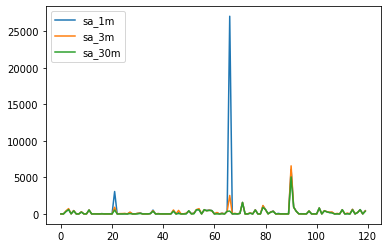

In [24]:
plt.plot(sa_1m_t, label="sa_1m")
plt.plot(sa_3m_t, label="sa_3m")
plt.plot(sa_30m_t, label="sa_30m")
plt.legend(loc="upper left")

# Print outliers
outliers = []
for i in range(len(sa_1m_t)):
    if sa_1m_t[i] > 2000:
        print(i, ": ", instances[i])
        outliers.append(i)

21 :  p_2-760-760_2
66 :  p_1-829-860_1
90 :  p_4-620-620_1


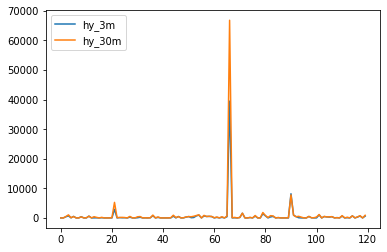

In [25]:
plt.plot(hy_3m_t_d, label="hy_3m")
plt.plot(hy_30m_t_d, label="hy_30m")
plt.legend(loc="upper left")

# Print outliers
outliers = []
for i in range(len(hy_3m_t_d)):
    if sa_1m_t[i] > 2000:
        print(i, ": ", instances[i])
        outliers.append(i)

In [26]:
# Remove outliers

for index in sorted(outliers, reverse=True):
    del sa_1m_t[index]
    del sa_3m_t[index]
    del sa_30m_t[index]
    del hy_3m_t_d[index]
    del hy_30m_t_d[index]


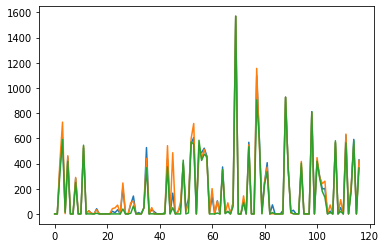

In [27]:
plt.plot(sa_1m_t, label="sa_1m")
plt.plot(sa_3m_t, label="sa_3m")
plt.plot(sa_30m_t, label="sa_30m")

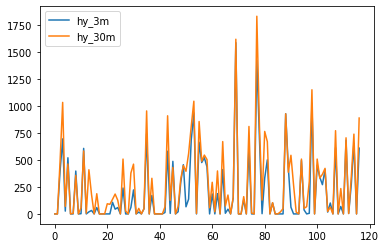

In [28]:
plt.plot(hy_3m_t_d, label="hy_3m")
plt.plot(hy_30m_t_d, label="hy_30m")
plt.legend(loc="upper left")

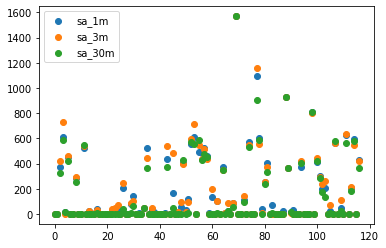

In [29]:
fig, ax = plt.subplots()
ax.scatter(range(len(sa_1m_t)), sa_1m_t, label="sa_1m")
ax.scatter(range(len(sa_3m_t)), sa_3m_t, label="sa_3m")
ax.scatter(range(len(sa_30m_t)), sa_30m_t, label="sa_30m")
plt.legend(loc="upper left")

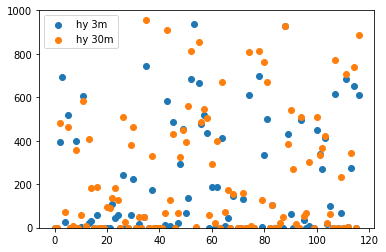

In [30]:
fig, ax = plt.subplots()
ax.scatter(range(len(hy_3m_t_d)), hy_3m_t_d, label="hy 3m")
ax.scatter(range(len(hy_30m_t_d)), hy_30m_t_d, label="hy 30m")
plt.ylim([-1, 1000])
plt.legend(loc="upper left")

In [31]:
print(hy_3m_t_d)

[0, 0, 393, 695, 26, 520, 0, 0, 397, 0, 2, 607, 0, 19, 32, 0, 59, 0, 0, 0, 0, 0, 108, 44, 59, 0, 240, 0, 0, 59, 222, 0, 17, 0, 48, 742, 0, 171, 0, 0, 0, 0, 13, 581, 5, 487, 0, 20, 291, 456, 66, 137, 685, 936, 0, 664, 476, 520, 436, 0, 185, 0, 188, 0, 411, 6, 44, 0, 147, 1586, 0, 0, 132, 0, 610, 0, 0, 1423, 698, 2, 332, 501, 0, 102, 0, 0, 0, 0, 928, 431, 62, 0, 0, 0, 495, 37, 0, 6, 1024, 0, 451, 340, 271, 411, 17, 101, 0, 613, 0, 69, 0, 682, 4, 273, 654, 0, 609]


In [32]:
find_best([vlns_30m_scores, vlns_3m_scores, sa_3m_scores, sa_1_max_scores], ["vlns_30m", "vlns_3m", "sa_3m", "max_1m"])

s_30-720-720_2 :  sa_3m 829
s_28-105-420_1 :  sa_3m 521
p_30-332-340_1 :  max_1m 381000541
p_7-431-480_1 :  max_1m 725003330
t_30-580-580_1 :  max_1m 1000873
p_19-540-540_1 :  sa_3m 462001182
t_2-490-800_1 :  max_1m 21282
s_21-530-560_1 :  sa_3m 971
p_30-52-420_1 :  sa_3m 290000497
t_15-77-80_1 :  max_1m 317
t_24-280-280_1 :  sa_3m 489
p_15-60-60_1 :  sa_3m 536000322
s_23-612-640_1 :  sa_3m 993
t_14-680-680_2 :  max_1m 2150
t_26-334-480_1 :  sa_3m 4000657
p_1-364-580_1 :  max_1m 32371
t_28-371-520_1 :  max_1m 783
s_10-120-180_1 :  sa_3m 652
s_15-500-500_1 :  sa_3m 1173
s_4-16-20_1 :  sa_3m 409
s_22-519-740_1 :  max_1m 1726
p_2-760-760_2 :  sa_3m 911026170
s_5-14-620_1 :  max_1m 5374
t_28-620-620_1 :  max_1m 1010
t_27-540-540_1 :  max_1m 856
t_22-760-760_1 :  max_1m 1001534
s_7-50-360_1 :  sa_3m 1889
t_10-389-940_1 :  max_1m 49004385
s_13-476-540_1 :  sa_3m 1519
s_24-900-900_1 :  sa_3m 1327
t_22-471-480_1 :  max_1m 77000961
t_11-400-400_1 :  sa_3m 102002114
s_11-680-680_1 :  sa_3m 2339


In [33]:
find_best([vlns_3m_scores, sa_1m_scores, sa_3m_scores, sa_30m_scores, sa_1_max_scores, parahy_3m_scores], 
          ["vlns_3m", "sa_1m", "sa_3m", "sa_30m", "max_1m", "phy 3m"])

s_30-720-720_2 :  sa_30m 771
s_28-105-420_1 :  sa_30m 478
p_30-332-340_1 :  sa_30m 324000443
p_7-431-480_1 :  sa_30m 591004036
t_30-580-580_1 :  max_1m 1000873
p_19-540-540_1 :  sa_30m 418001053
t_2-490-800_1 :  sa_30m 20660
s_21-530-560_1 :  sa_30m 866
p_30-52-420_1 :  sa_30m 250000478
t_15-77-80_1 :  max_1m 317
t_24-280-280_1 :  sa_30m 460
p_15-60-60_1 :  sa_1m 523000331
s_23-612-640_1 :  sa_30m 926
t_14-680-680_2 :  sa_30m 1712
t_26-334-480_1 :  sa_30m 587
p_1-364-580_1 :  sa_30m 32300
t_28-371-520_1 :  max_1m 783
s_10-120-180_1 :  sa_30m 629
s_15-500-500_1 :  sa_30m 1122
s_4-16-20_1 :  sa_1m 409
s_22-519-740_1 :  sa_30m 1104
p_2-760-760_2 :  sa_30m 535025520
s_5-14-620_1 :  sa_30m 4509
t_28-620-620_1 :  sa_30m 768
t_27-540-540_1 :  sa_30m 659
t_22-760-760_1 :  sa_30m 1163
s_7-50-360_1 :  sa_30m 1816
t_10-389-940_1 :  sa_30m 39003640
s_13-476-540_1 :  sa_30m 1401
s_24-900-900_1 :  sa_30m 1207
t_22-471-480_1 :  phy 3m 3000889
t_11-400-400_1 :  sa_30m 63001456
s_11-680-680_1 :  sa_30m

In [34]:

os.chdir("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\parahy_30m")
solutions = glob.glob("*.info")

instances_nr = 0
instances_where_gurobi_wins = 0
nr_gurobi_wins = 0
inst_ties = 0
nr_ties = 0
inst_sa_wins = 0
nr_sa_wins = 0

def get_info_about_wins(text, lines, total_wins, instances_wins):
    line = [line for line in lines if text in line][0]
    if(int(line.split(":")[1]) > 0):
        total_wins += int(line.split(":")[1])
        instances_wins += 1
        
    return total_wins, instances_wins


for instance in instances:
    name = instance.split('.')[0]
    for solution in solutions:
        if name in solution or name.replace("s", "standard") in solution or name.replace("p", "perez") in solution or name.replace("t", "tight") in solution:
            f = open(solution, "r")
            lines = f.read().split('\n')
            instances_nr += 1
            nr_gurobi_wins, instances_where_gurobi_wins = get_info_about_wins("Gurobi wins", lines, nr_gurobi_wins, instances_where_gurobi_wins)
            nr_ties, inst_ties = get_info_about_wins("SA wins", lines, nr_ties, inst_ties)
            nr_sa_wins, inst_sa_wins = get_info_about_wins("Ties", lines, nr_sa_wins, inst_sa_wins)

total_solvercalls = nr_gurobi_wins + nr_sa_wins + nr_ties
            
print("Number of instances: ", instances_nr)
print("Instances where gurobi wins at least once: ", 
      instances_where_gurobi_wins, ", times gurobi wins: ", nr_gurobi_wins, 
      "(", nr_gurobi_wins/float(total_solvercalls), ")")

print("Instances where SA wins at least once: ", 
      inst_sa_wins, ", times SA wins: ", nr_sa_wins, 
      "(", nr_sa_wins/float(total_solvercalls), ")")

print("Instances with ties: ", 
      inst_ties, ", nmber of ties: ", nr_ties, 
      "(", nr_ties/float(total_solvercalls), ")")

print("Number of solver calls: ", total_solvercalls)

Number of instances:  119
Instances where gurobi wins at least once:  12 , times gurobi wins:  21 ( 0.006664550936210727 )
Instances where SA wins at least once:  119 , times SA wins:  785 ( 0.2491272611869248 )
Instances with ties:  118 , nmber of ties:  2345 ( 0.7442081878768645 )
Number of solver calls:  3151
